<a href="https://colab.research.google.com/github/Fordalo/Data_SCIENCE_WORK/blob/main/Sleeptime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we want to load the fitbit sleep time dataset into google colab using google colab module. This is useful because google colab deletes all data once runtime runs out. Mounting the drive allows us to always reload the dataset. We also drop the first row because it contains NaN's

In [161]:
import pandas as pd
import numpy as np
import datetime

#moutning google drive to google colab
#allows me to acces google drive files
from google.colab import drive

drive.mount('/content/gdrive')


sleepdata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/projects/sleeptime analysis/December Sleep data - Sheet1.csv')
sleepdata.head()

#removing first row with NAN
sleepdata.drop(index = 0)
# sleepdata.iloc[1:, :] this also removes first row. basically takes second row to



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
1,Wednesday,12/01/2021,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am
2,Thursday,12/02/2021,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am
3,Friday,12/03/2021,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am
4,Saturday,12/04/2021,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am
5,Sunday,12/05/2021,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am
6,Monday,12/06/2021,80.0,7:18:00,18.00%,16.00%,56.00%,11:28pm - 7:47am
7,Tuesday,12/07/2021,89.0,8:02:00,21.00%,11.00%,94.00%,10:09pm - 7:18am
8,Wednesday,12/08/2021,85.0,6:47:00,22.00%,16.00%,94.00%,11:40pm - 7:33
9,Thursday,12/09/2021,85.0,7:32:00,12.00%,14.00%,96.00%,10:47pm - 7:27am
10,Friday,12/10/2021,87.0,7:45:00,20.00%,13.00%,75.00%,10:27pm - 7:07am


In [162]:
sleepdata = sleepdata.drop(index = 0)
sleepdata.head()

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
1,Wednesday,12/01/2021,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am
2,Thursday,12/02/2021,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am
3,Friday,12/03/2021,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am
4,Saturday,12/04/2021,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am
5,Sunday,12/05/2021,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am


Here we would like to drop the December column because it only contains categorical values that will be useless to our OLS

In [163]:
sleepdata = sleepdata.iloc[:, 1:]
sleepdata.head(10)

,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
1,12/01/2021,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am
2,12/02/2021,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am
3,12/03/2021,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am
4,12/04/2021,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am
5,12/05/2021,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am
6,12/06/2021,80.0,7:18:00,18.00%,16.00%,56.00%,11:28pm - 7:47am
7,12/07/2021,89.0,8:02:00,21.00%,11.00%,94.00%,10:09pm - 7:18am
8,12/08/2021,85.0,6:47:00,22.00%,16.00%,94.00%,11:40pm - 7:33
9,12/09/2021,85.0,7:32:00,12.00%,14.00%,96.00%,10:47pm - 7:27am
10,12/10/2021,87.0,7:45:00,20.00%,13.00%,75.00%,10:27pm - 7:07am


We will now work with the DATE column to somehow use it as one of our features. with the slashes in each entry, pandas cannot read this as a date, we must use some type of regex function to change the slashes to dashes because that is the format pandas takes in.

NOTE: in pandas, each column is considered a series, this will be very important later in this project

In [164]:
sleepdata["DATE"]

1     12/01/2021
2     12/02/2021
3     12/03/2021
4     12/04/2021
5     12/05/2021
6     12/06/2021
7     12/07/2021
8     12/08/2021
9     12/09/2021
10    12/10/2021
11    12/11/2021
12    12/12/2021
13    12/13/2021
14    12/14/2021
15    12/15/2021
16    12/16/2021
17    12/17/2021
18    12/18/2021
19    12/19/2021
20    12/20/2021
21    12/21/2021
22    12/22/2021
23    12/23/2021
24    12/24/2021
25    12/25/2021
26    12/26/2021
27    12/27/2021
28    12/28/2021
29    12/29/2021
30    12/30/2021
31    12/31/2021
Name: DATE, dtype: object

Here we replace all "/" with "-" with the pandas replace function, and then we set this equal to the DATE column to overwrite it

In [165]:
sleepdata["DATE"].replace("/", "-", regex = True)
sleepdata["DATE"] = pd.to_datetime(sleepdata["DATE"].replace("/", "-", regex = True))
sleepdata.head()


,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
1,2021-12-01,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am
2,2021-12-02,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am
3,2021-12-03,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am
4,2021-12-04,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am
5,2021-12-05,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am


We are now splitting the DATE column into three different colums

1.   Year
2.   Month
3.   Day

Then we will add these columns to our sleep time dataframe


In [166]:
#creating new column for year month and day
sleepdata["YEAR"] = sleepdata["DATE"].dt.year
sleepdata["MONTH"] = sleepdata["DATE"].dt.month
sleepdata["DAY"] = sleepdata["DATE"].dt.day
sleepdata.head()

,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME,YEAR,MONTH,DAY
1,2021-12-01,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am,2021,12,1
2,2021-12-02,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am,2021,12,2
3,2021-12-03,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am,2021,12,3
4,2021-12-04,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am,2021,12,4
5,2021-12-05,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am,2021,12,5


Since we broke up the DATE column into three different columns, and added it, we can now delete the DATE column here

In [167]:
sleepdata = sleepdata.iloc[: , 1:]
sleepdata.head()

,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME,YEAR,MONTH,DAY
1,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am,2021,12,1
2,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am,2021,12,2
3,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am,2021,12,3
4,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am,2021,12,4
5,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am,2021,12,5


Now we will work with the HOURS OF SLEEP column by converting it to a total number of minutes. We are doing this because its just way easier to work with in our OLS. We do this by doing the following:

1.   Convert the HOURS OF SLEEP column into a pandas  datetime object
2.   Extract the number of hours and multiply it by 60, Extract the number of   minutes, Extract the number of seconds and divide it by 60
3. Add them up and add the column to dataframe


NOTE: We did not need to do seconds because every entry in the datafram does not have seconds included but its good to have the code anyway



In [168]:
total_amount_of_sleep = pd.to_datetime(sleepdata["HOURS OF SLEEP"])
total_amount_of_sleep.dt.hour * 60 + total_amount_of_sleep.dt.minute + (total_amount_of_sleep.dt.second)/60


sleepdata["SLEEPMINUTES"] = total_amount_of_sleep.dt.hour * 60 + total_amount_of_sleep.dt.minute + (total_amount_of_sleep.dt.second)/60
sleepdata.head()

,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME,YEAR,MONTH,DAY,SLEEPMINUTES
1,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am,2021,12,1,453.0
2,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am,2021,12,2,437.0
3,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am,2021,12,3,437.0
4,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am,2021,12,4,503.0
5,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am,2021,12,5,439.0


In [169]:
#dropping hours of sleep column here since we added number of minutes in sleep
sleepdata = sleepdata.drop(columns = ['HOURS OF SLEEP'])
sleepdata.head()

,SLEEP SCORE,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME,YEAR,MONTH,DAY,SLEEPMINUTES
1,91.0,23.00%,19.00%,98.00%,10:56pm - 7:20am,2021,12,1,453.0
2,81.0,16.00%,13.00%,94.00%,10:45pm - 6:58am,2021,12,2,437.0
3,80.0,15.00%,17.00%,78.00%,10:51pm - 7:02am,2021,12,3,437.0
4,85.0,20.00%,15.00%,58.00%,9:53pm - 7:17am,2021,12,4,503.0
5,82.0,20.00%,12.00%,79.00%,11:54pm - 8:16am,2021,12,5,439.0


Now we want to work with REM SLEEP, DEEP SLEEP, and HEART RATE BELOW RESTING because they are all percentages. We need to convert all three columns to percentages by removing the percentage sing, then turning the number into a float, and then dividing it by 100.

NOTE: for our replace function, we usually use single brackets when working with one column. Since we want to reun our reg ex replace function on all three columns, we need to use double brackets, and list all three columns in the brackets.

In [170]:
percentages = sleepdata[["REM SLEEP", "DEEP SLEEP", "HEART RATE BELOW RESTING"]].replace("%", "", regex = True)
percentages = percentages.astype(float)/100
percentages




,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING
1,0.23,0.19,0.98
2,0.16,0.13,0.94
3,0.15,0.17,0.78
4,0.20,0.15,0.58
5,0.20,0.12,0.79
6,0.18,0.16,0.56
7,0.21,0.11,0.94
8,0.22,0.16,0.94
9,0.12,0.14,0.96
10,0.20,0.13,0.75


In [171]:
#replacing the columns with percentages
sleepdata[["REM SLEEP", "DEEP SLEEP", "HEART RATE BELOW RESTING"]] = percentages
sleepdata.head()


,SLEEP SCORE,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME,YEAR,MONTH,DAY,SLEEPMINUTES
1,91.0,0.23,0.19,0.98,10:56pm - 7:20am,2021,12,1,453.0
2,81.0,0.16,0.13,0.94,10:45pm - 6:58am,2021,12,2,437.0
3,80.0,0.15,0.17,0.78,10:51pm - 7:02am,2021,12,3,437.0
4,85.0,0.20,0.15,0.58,9:53pm - 7:17am,2021,12,4,503.0
5,82.0,0.20,0.12,0.79,11:54pm - 8:16am,2021,12,5,439.0


In this section, we want to format the SLEEP time column in a way that can be useful for OLS. This means converting the sleep time and wake time into numbers. real time should be retreivable by simply dividing by 60.



1.   First we split the column by the "-" in the middle
2.   then we store the values in corresponding arrays using a for loop
3.   then we format the values in each array into a date time object
4.   Then we convert the values into total number of minutes (for sleep time, we add 12 hours, we are working in military time here basically)
5.   Save values back into sleepdata dataframe, and then remove the SLEEPTIME column

NOTE: we also want to remove the YEAR & MONTH column since there is no variance, and it will mess up the rank of our matrix for OLS



In [172]:
#declare arrays to store values of sleeptime and wake time
EVENINGTIME = []
WAKETIME = []

#Splitting the SLEEP TIME COLUMN 
sleeptimelist = sleepdata["SLEEP TIME"].str.split(" - ")


#entering all values from split tuples into arrays with for loop
for i in sleeptimelist:
  EVENINGTIME.append(i[0])
  WAKETIME.append(i[1])

#convert arrays to data frame to use pandas operations like str replace
WAKETIME = pd.DataFrame(WAKETIME)
#removing the am, and the pms from both columns
WAKETIME = WAKETIME[0].replace("am", "", regex = True)
EVENINGTIME = pd.DataFrame(EVENINGTIME)
EVENINGTIME = EVENINGTIME[0].replace({"pm": "", "am":""}, regex = True)


#converting wake time and sleep time into minutes and then saving it to datafram
WAKETIME = pd.to_datetime(WAKETIME).dt.hour * 60 + pd.to_datetime(WAKETIME).dt.minute
EVENINGTIME = pd.to_datetime(EVENINGTIME).dt.hour * 60 + pd.to_datetime(EVENINGTIME).dt.minute + (12 * 60)
sleepdata["WAKETIME"] = WAKETIME
sleepdata["EVENINGTIME"] = EVENINGTIME

#dropping irrelevant columns here
sleepdata = sleepdata.drop(columns = ['SLEEP TIME', 'YEAR', 'MONTH'])
sleepdata.head()

,SLEEP SCORE,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,DAY,SLEEPMINUTES,WAKETIME,EVENINGTIME
1,91.0,0.23,0.19,0.98,1,453.0,418.0,1365.0
2,81.0,0.16,0.13,0.94,2,437.0,422.0,1371.0
3,80.0,0.15,0.17,0.78,3,437.0,437.0,1313.0
4,85.0,0.20,0.15,0.58,4,503.0,496.0,1434.0
5,82.0,0.20,0.12,0.79,5,439.0,467.0,1408.0


Before performing OLS, We will now visualize how sleep score correlates with every independent variable

AxesSubplot(0.672059,0.125;0.227941x0.755) AxesSubplot(0.547727,0.125;0.352273x0.755) AxesSubplot(0.125,0.125;0.352273x0.755)


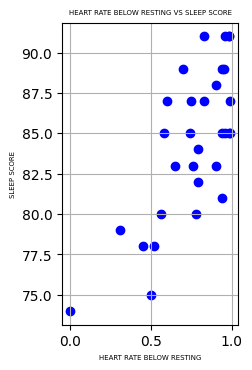

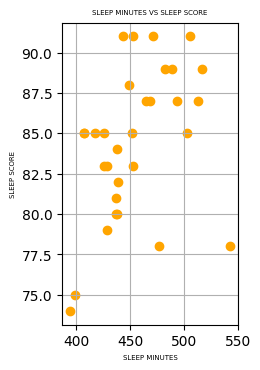

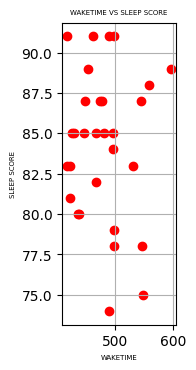

In [200]:
import matplotlib.pyplot as plt

figure1 = plt.figure(figsize =(5,4), dpi = 100)
axe3 = figure1.add_subplot(1, 2, 1)
axe3.scatter(sleepdata['HEART RATE BELOW RESTING'], sleepdata['SLEEP SCORE'], color='blue')
axe3.set_title('HEART RATE BELOW RESTING VS SLEEP SCORE', fontsize=5)
axe3.set_xlabel('HEART RATE BELOW RESTING', fontsize=5)
axe3.set_ylabel('SLEEP SCORE', fontsize= 5)
axe3.grid(True)


figure2 = plt.figure(figsize =(5,4), dpi = 100)
axe4 = figure2.add_subplot(1, 2, 2)
axe4.scatter(sleepdata['SLEEPMINUTES'], sleepdata['SLEEP SCORE'], color='orange')
axe4.set_title('SLEEP MINUTES VS SLEEP SCORE', fontsize=5)
axe4.set_xlabel('SLEEP MINUTES', fontsize= 5)
axe4.set_ylabel('SLEEP SCORE', fontsize= 5)
axe4.grid(True)


figure3 = plt.figure(figsize =(5,4), dpi = 100)
axe5 = figure3.add_subplot(1, 3, 3)
axe5.scatter(sleepdata['WAKETIME'], sleepdata['SLEEP SCORE'], color='red')
axe5.set_title('WAKETIME VS SLEEP SCORE', fontsize=5)
axe5.set_xlabel('WAKETIME', fontsize=5)
axe5.set_ylabel('SLEEP SCORE', fontsize=5)
axe5.grid(True)

print(axe5, axe4, axe3)



